In [5]:
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
from IPython.display import display, HTML
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_curve, roc_auc_score

# Loading and Labeling data

In [6]:
import os
import csv

# Paths to directories
base_dir = 'breastcancer'
train_dir = os.path.join(base_dir, 'train')
healthy_dir = os.path.join(train_dir, 'healthy')
sick_dir = os.path.join(train_dir, 'sick')

# Create a CSV file
csv_filename = 'images_labels.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    

    # Header of the CSV file
    csv_writer.writerow(["Image_Name", "Label"])

    # Process healthy images
    for filename in os.listdir(healthy_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image file extensions
            csv_writer.writerow([filename,'Healthy'])

    # Process sick images
    for filename in os.listdir(sick_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image file extensions
            csv_writer.writerow([filename, 'Sick'])

print(f"CSV file '{csv_filename}' has been created.")

CSV file 'images_labels.csv' has been created.


In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le=LabelEncoder()
df=pd.read_csv('images_labels.csv')
df['Label']=le.fit_transform(df['Label'])
df.head(3)



,Image_Name,Label
0,H_1.jpg,0
1,H_10.jpg,0
2,H_100.jpg,0


In [8]:
df.tail(3)


,Image_Name,Label
1441,S_94.jpg,1
1442,S_95.jpg,1
1443,S_96.jpg,1


# Data representation

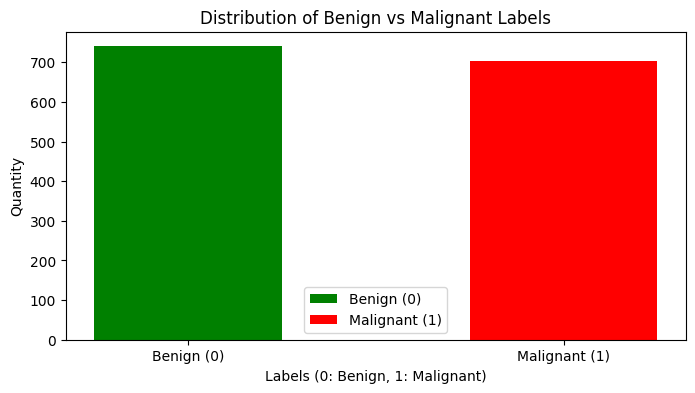

----------------------------------------------------------------------------------------------------
The healthy count is 740
The Malignant count is 704
----------------------------------------------------------------------------------------------------


In [9]:
# Plotting the histogram for each label separately to specify different colors
plt.figure(figsize=(8, 4))

# Extracting counts for each label
healthy_counts = df[df['Label'] == 0]['Label'].value_counts()
malignant_counts = df[df['Label'] == 1]['Label'].value_counts()

# Plotting the histograms
plt.bar(healthy_counts.index, healthy_counts.values, width=0.5, color='green', label='Benign (0)')
plt.bar(malignant_counts.index, malignant_counts.values, width=0.5, color='red', label='Malignant (1)')

# Adding labels and title
plt.title("Distribution of Benign vs Malignant Labels")
plt.xlabel("Labels (0: Benign, 1: Malignant)")
plt.ylabel("Quantity")
plt.xticks(ticks=[0, 1], labels=["Benign (0)", "Malignant (1)"])
plt.legend()
plt.grid(False)

# Show the plot
plt.show()
healthy_count = df[df['Label'] == 0].shape[0]
malignant_count = df[df['Label'] == 1].shape[0]
print("--"*50)
# Display the counts
print(f'The healthy count is {healthy_count}')
print(f'The Malignant count is {malignant_count}')
print("--"*50)

# Data Overview

In [10]:
import os
from PIL import Image
from IPython.display import display, HTML

# Function to display images side by side using IPython display
def display_images_side_by_side(image_paths, title):
    images_html = ""
    for image_path in image_paths:
        img = Image.open(image_path)
        images_html += f"<img style='width: 250px; margin: 20px; display: inline-block;align: center' src='{image_path}' alt='{title}' />"
    display(HTML(f"<div style='text-align: center;'>{title}</div>" + images_html))

# Specific filenames to display
healthy_images = ['H_1.jpg', 'H_2.jpg', 'H_3.jpg']
sick_images = ['S_1.jpg', 'S_2.jpg', 'S_12.jpg']

# Base directory where the images are located
base_dir = 'breastcancer/train'

# Subdirectories for healthy and sick images (converted to Unix-like paths for this environment)
healthy_dir = os.path.join(base_dir, 'Healthy')
sick_dir = os.path.join(base_dir, 'Sick')

# Full paths to the specified images
healthy_image_paths = [os.path.join(healthy_dir, img) for img in healthy_images]
sick_image_paths = [os.path.join(sick_dir, img) for img in sick_images]

# Display the selected images using IPython display
display_images_side_by_side(healthy_image_paths, 'Healthy')
display_images_side_by_side(sick_image_paths, 'Sick')


In [11]:
import os
import csv
from PIL import Image

# Paths to directories
base_dir = 'breastcancer'
train_dir = os.path.join(base_dir, 'train')
healthy_dir = os.path.join(train_dir, 'healthy')
sick_dir = os.path.join(train_dir, 'sick')
resized_dir = os.path.join(train_dir, 'resized')
os.makedirs(resized_dir, exist_ok=True)  # Make sure the resized directory exists

csv_filename = 'images_labels_resized.csv'

# Desired size (you can change this based on your needs)
desired_size = (224, 224)

# Create or overwrite the CSV file
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["Image_Name", "Label"])  # Write header

    # Process and save healthy images
    for filename in os.listdir(healthy_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image file extensions
            image_path = os.path.join(healthy_dir, filename)
            with Image.open(image_path) as img:
                img_resized = img.resize(desired_size, Image.LANCZOS)
                img_resized.save(os.path.join(resized_dir, filename))
            csv_writer.writerow([filename, 0])

    # Process and save sick images
    for filename in os.listdir(sick_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image file extensions
            image_path = os.path.join(sick_dir, filename)
            with Image.open(image_path) as img:
                img_resized = img.resize(desired_size, Image.LANCZOS)
                img_resized.save(os.path.join(resized_dir, filename))
            csv_writer.writerow([filename, 1])

print(f"Images have been resized, saved in '{resized_dir}' directory, and details stored in '{csv_filename}'.")

Images have been resized, saved in 'breastcancer\train\resized' directory, and details stored in 'images_labels_resized.csv'.


In [12]:
from IPython.display import display, HTML
from PIL import Image
import os

# Function to display original and resized images side by side using HTML
def compare_images_html(original_path, resized_path, title):
    # Generate the HTML to display images side by side
    images_html = f"""
    <div>
        <div style='float: left;margin: 20px'>
            <p>Original {title}:</p>
            <img src='{original_path}' width='280' />
        </div>
        <div style='float: left; padding-left: 40px;'>
            <p>Resized {title}:</p>
            <img src='{resized_path}' width='220' />
        </div>
    </div>
    <div style='clear: both;'></div>
    """
    
    # Display HTML
    display(HTML(images_html))

# Assuming the base directory is the current working directory since no absolute path is provided
base_dir = 'breastcancer/train'
healthy_dir = os.path.join(base_dir, 'Healthy')
sick_dir = os.path.join(base_dir, 'Sick')
resized_dir = os.path.join(base_dir, 'Resized')
os.makedirs(resized_dir, exist_ok=True)  # Ensure the resized directory exists

# File names for demonstration
healthy_file = 'H_1.jpg'
sick_file = 'S_1.jpg'

# Paths for demonstration
healthy_path = os.path.join(healthy_dir, healthy_file)
resized_healthy_path = os.path.join(resized_dir, healthy_file)
sick_path = os.path.join(sick_dir, sick_file)
resized_sick_path = os.path.join(resized_dir, sick_file)

# Check if the original and resized images exist and display them
if os.path.isfile(healthy_path) and os.path.isfile(resized_healthy_path):
    # Display the comparison between original and resized images for a healthy image
    compare_images_html(healthy_path, resized_healthy_path, 'Healthy')
else:
    print(f"Missing files for healthy images: {healthy_path} or {resized_healthy_path}")

if os.path.isfile(sick_path) and os.path.isfile(resized_sick_path):
    # Display the comparison between original and resized images for a sick image
    compare_images_html(sick_path, resized_sick_path, 'Sick')
else:
    print(f"Missing files for sick images: {sick_path} or {resized_sick_path}")

# Converting Images into numpy arrays and flattening them

In [13]:
import os
import csv
import numpy as np
from PIL import Image

base_dir = 'breastcancer'
train_dir = os.path.join(base_dir, 'train')
resized_dir = os.path.join(train_dir, 'resized')
csv_filename = 'images_labels_resized.csv'

flattened_images_list = []
labels_list = []

with open(csv_filename, 'r') as csvfile:
    csv_reader = csv.reader(csvfile)
    next(csv_reader)  # Skip the header
    
    for row in csv_reader:
        image_name, label = row
        image_path = os.path.join(resized_dir, image_name)

        with Image.open(image_path) as img:
            img_arr = np.array(img)
            flattened_img_arr = img_arr.flatten()  # Flatten the image
            flattened_images_list.append(flattened_img_arr)
            labels_list.append(int(label))

# Convert lists to numpy arrays
x = np.array(flattened_images_list)
y = np.array(labels_list)
df=pd.DataFrame(x)
df['target']=y

print(f"Flattened images numpy shape: {x.shape}")
print(f"Labels numpy shape: {y.shape}")

Flattened images numpy shape: (1444, 50176)
Labels numpy shape: (1444,)


In [14]:
x,y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([0, 0, 0, ..., 1, 1, 1]))

# Scaling the data

In [15]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x =s.fit_transform(x)

In [16]:
x

array([[-0.13889682, -0.14942555, -0.16532217, ..., -0.23096791,
        -0.21544404, -0.19482728],
       [-0.13889682, -0.14942555, -0.16532217, ..., -0.23096791,
        -0.21544404, -0.19482728],
       [-0.13889682, -0.14942555, -0.16532217, ..., -0.23096791,
        -0.21544404, -0.19482728],
       ...,
       [-0.13889682, -0.14942555, -0.16532217, ..., -0.23096791,
        -0.21544404, -0.19482728],
       [-0.13889682, -0.14942555, -0.16532217, ..., -0.23096791,
        -0.21544404, -0.19482728],
       [-0.13889682, -0.14942555, -0.16532217, ..., -0.23096791,
        -0.21544404, -0.19482728]])

# Splitting train and test data

# Principal Component Analysis(PCA) vs Independent Component Analysis(ICA)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
def eachpca(n):
    
    
    print(f'FOR {n}:  ')
    pca = PCA(n_components = n)
    pca.fit(x)
    data_pca = pca.transform(x)
    data_pca = pd.DataFrame(data_pca,columns=[i for i in range(data_pca.shape[1])])
    data_pca = s.fit_transform(data_pca)


    x_train,x_test,y_train,y_test = train_test_split(data_pca,y,test_size=0.33,shuffle=True,random_state=42)
    models = {
        "XGBoost": XGBClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=10000),
        "KNN": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(random_state=42)
    }
    net_acc = 0
    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        net_acc+= accuracy
        print(f"Accuracy for {model_name}: {accuracy * 100:.2f}%")
    print(f"the mean score is {(net_acc/5)*100 }")
        
    print('-' * 50)
    print(data_pca)
    return (net_acc/5)*100

In [20]:
#import train_test_split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data_pca,y,test_size=0.33,shuffle=True,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'data_pca' is not defined

In [22]:
test = [178,200,224,257,300,320]
x_graph_pca=[]
for i in test:
    x_graph_pca.append(eachpca(i))

FOR 178:  
Accuracy for XGBoost: 92.24%
Accuracy for Random Forest: 91.40%
Accuracy for Logistic Regression: 88.26%
Accuracy for KNN: 91.19%
Accuracy for Decision Tree: 83.23%
the mean score is 89.26624737945494
--------------------------------------------------
[[-0.73703161  1.03766463 -0.31063301 ... -0.5896383   0.47937423
   0.02872908]
 [-0.26553773  1.29103624 -0.36380076 ... -0.1437228  -0.00590057
  -1.64321223]
 [-1.43811992 -0.59960828  0.94145651 ...  0.53113158 -0.67857315
  -0.71308009]
 ...
 [ 1.12702295  2.37871905  2.03097325 ...  0.45958379  0.0192757
   1.88739347]
 [ 1.08066634  2.63180936  1.79639348 ...  0.22238369 -1.03138258
   2.09054989]
 [ 1.10698174  2.59307914  1.71995892 ...  0.49846923 -1.33728365
   2.35896519]]
FOR 200:  
Accuracy for XGBoost: 93.29%
Accuracy for Random Forest: 90.99%
Accuracy for Logistic Regression: 89.73%
Accuracy for KNN: 89.94%
Accuracy for Decision Tree: 82.18%
the mean score is 89.22431865828091
----------------------------------

In [ ]:
x_graph_pca

[90.72664359861594,
 89.6885813148789,
 90.03460207612456,
 88.99653979238755,
 87.82006920415225,
 87.82006920415225]

In [ ]:
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def eachica(n):
    print(f'FOR {n} components:  ')
    
    ica = FastICA(n_components=n, random_state=42)
    data_ica = ica.fit_transform(x)
    data_ica = pd.DataFrame(data_ica, columns=[i for i in range(data_ica.shape[1])])
    s = StandardScaler()
    data_ica = s.fit_transform(data_ica)

    x_train, x_test, y_train, y_test = train_test_split(data_ica, y, test_size=0.20, shuffle=True, random_state=42)
    
    models = {
        "XGBoost": XGBClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=10000),
        "KNN": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(random_state=42)
    }
    net_acc=0
    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        net_acc+= accuracy
        print(f"Accuracy for {model_name}: {accuracy * 100:.2f}%")
    
    print('-' * 50) 
    return (net_acc /5)*100

In [ ]:
test = [178,200,224,257,300,320]
x_graph_ica =[]
for i in test:
    x_graph_ica.append(eachica(i))

FOR 178 components:  
Accuracy for XGBoost: 75.09%
Accuracy for Random Forest: 76.12%
Accuracy for Logistic Regression: 90.31%
Accuracy for KNN: 93.77%
Accuracy for Decision Tree: 81.66%
the mean score is 83.3910034602076
--------------------------------------------------
FOR 200 components:  
Accuracy for XGBoost: 75.78%
Accuracy for Random Forest: 77.51%
Accuracy for Logistic Regression: 90.31%
Accuracy for KNN: 92.04%
Accuracy for Decision Tree: 68.51%
the mean score is 80.83044982698962
--------------------------------------------------
FOR 224 components:  
Accuracy for XGBoost: 71.97%
Accuracy for Random Forest: 70.24%
Accuracy for Logistic Regression: 90.31%
Accuracy for KNN: 91.00%
Accuracy for Decision Tree: 75.09%
the mean score is 79.72318339100346
--------------------------------------------------
FOR 257 components:  
Accuracy for XGBoost: 68.86%
Accuracy for Random Forest: 70.93%
Accuracy for Logistic Regression: 92.04%
Accuracy for KNN: 88.24%
Accuracy for Decision Tree:

In [ ]:
x_graph_ica

[83.3910034602076,
 80.83044982698962,
 79.72318339100346,
 75.98615916955018,
 76.53979238754324,
 74.67128027681662]

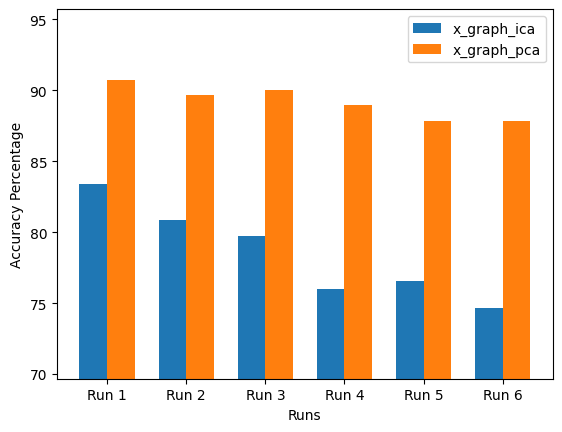

In [ ]:
labels = ['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5', 'Run 6']

# Set the width of the bars and the bar positions
bar_width = 0.35
x = np.arange(len(labels))

# Create the side-by-side bar graph
fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, x_graph_ica, bar_width, label='x_graph_ica')
bar2 = ax.bar(x + bar_width/2, x_graph_pca, bar_width, label='x_graph_pca')

# Set the y-axis limits to accommodate the data range
ax.set_ylim(min(min(x_graph_ica), min(x_graph_pca)) - 5, max(max(x_graph_ica), max(x_graph_pca)) + 5)

# Add labels and a legend
ax.set_xlabel('Runs')
ax.set_ylabel('Accuracy Percentage')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

# After analysis,we find pca better suits for our data,we take the components size with maximum accuracy

In [ ]:
max_acc_component = test[x_graph_pca.index(max(x_graph_pca))]
max_acc_component

178

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = max_acc_component)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)
x_train,x_test

(array([[ 0.64205758, -0.26858207, -0.77437043, ...,  0.43733681,
         -1.03830125, -0.89149662],
        [ 7.15388548,  1.91462356,  2.33395031, ...,  0.16974551,
         -0.18562489, -0.49141558],
        [ 0.12015805, -0.81632005, -0.56246578, ..., -1.11915874,
          1.02772147,  1.30958242],
        ...,
        [ 0.08391162,  0.22308026, -0.17035092, ..., -0.1825868 ,
          0.13147927,  0.91110021],
        [-0.46846255,  0.57618371,  0.22673968, ...,  0.64592564,
         -2.5716854 , -2.2244778 ],
        [ 0.20063012,  0.03887319, -0.4118516 , ..., -0.16673987,
         -0.29680333,  0.08227421]]),
 array([[-0.21825826, -0.15022319,  0.24874225, ..., -0.14803835,
          1.44775932, -1.65918583],
        [ 0.01471813,  0.42581531, -0.2310545 , ..., -1.04254209,
          0.46134181, -0.30431563],
        [ 0.01727211,  0.08585279, -0.31135062, ..., -0.41863396,
          0.79424206,  0.80034532],
        ...,
        [-0.01910209, -0.26306556, -0.33752211, ...,  

#  Hyperparameter tuning for xgboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
}

clf_xgb = XGBClassifier(objective='binary:logistic')
random_search_xgb = RandomizedSearchCV(clf_xgb, param_distributions=param_dist, n_iter=10, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
random_search_xgb.fit(x_train, y_train)

print("RandomizedSearchCV - Best parameters:", random_search_xgb.best_params_)
print("RandomizedSearchCV - Best cross-validation score:", random_search_xgb.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomizedSearchCV - Best parameters: {'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}
RandomizedSearchCV - Best cross-validation score: 0.8365899257518296


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [4, 5, 6],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0.1, 0.2],
}

grid_search_xgb = GridSearchCV(clf_xgb, param_grid=param_grid, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_xgb.fit(x_train, y_train)

print("GridSearchCV - Best parameters:", grid_search_xgb.best_params_)
print("GridSearchCV - Best cross-validation score:", grid_search_xgb.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
GridSearchCV - Best parameters: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}
GridSearchCV - Best cross-validation score: 0.9108225108225108


In [ ]:
from bayes_opt import BayesianOptimization

def xgb_evaluate(max_depth, gamma, colsample_bytree, learning_rate, n_estimators):
    params = {
        'max_depth': int(max_depth),
        'gamma': gamma,
        'colsample_bytree': colsample_bytree,
        'learning_rate': learning_rate,
        'n_estimators': int(n_estimators),
        'objective': 'binary:logistic',
    }
    clf = XGBClassifier(**params)
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    return accuracy_score(y_test, predictions)

optimizer = BayesianOptimization(
    f=xgb_evaluate,
    pbounds={
        'max_depth': (3, 8),
        'gamma': (0, 0.4),
        'colsample_bytree': (0.6, 1.0),
        'learning_rate': (0.01, 0.3),
        'n_estimators': (50, 200)
    },
    random_state=42,
)
optimizer.maximize(init_points=5, n_iter=10)

print("Bayesian Optimization - Best parameters:", optimizer.max['params'])


|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.9135    | 0.7498    | 0.3803    | 0.2223    | 5.993     | 73.4      |
| 2         | 0.9308    | 0.6624    | 0.02323   | 0.2612    | 6.006     | 156.2     |
| 3         | 0.9377    | 0.6082    | 0.388     | 0.2514    | 4.062     | 77.27     |
| 4         | 0.917     | 0.6734    | 0.1217    | 0.1622    | 5.16      | 93.68     |
| 5         | 0.917     | 0.8447    | 0.0558    | 0.09472   | 4.832     | 118.4     |
| 6         | 0.9343    | 0.6292    | 0.1095    | 0.2942    | 5.981     | 156.5     |
| 7         | 0.9135    | 0.6262    | 0.2114    | 0.1955    | 3.087     | 77.19     |
| 8         | 0.91      | 0.9102    | 0.3197    | 0.06157   | 4.285     | 77.39     |
| 9         | 0.9308    | 0.6646    | 0.2579    | 0.1416    | 6.015     | 156.1     |
| 10        | 0.9343    | 0.923     | 0.07032   | 0.10

# Extracting Best Parameters and Comparing

In [ ]:
# Extract best parameters and scores
best_params_random = random_search_xgb.best_params_
best_score_random = random_search_xgb.best_score_

best_params_grid = grid_search_xgb.best_params_
best_score_grid = grid_search_xgb.best_score_

best_params_bayesian = optimizer.max['params']
best_score_bayesian = optimizer.max['target']

# Determine which set of parameters is the best
best_algo = "RandomizedSearchCV"
best_params = best_params_random
best_score = best_score_random

if best_score_grid > best_score:
    best_algo = "GridSearchCV"
    best_params = best_params_grid
    best_score = best_score_grid

if best_score_bayesian > best_score:
    best_algo = "Bayesian Optimization"
    best_params = best_params_bayesian
    best_score = best_score_bayesian

print(f"Best Algorithm: {best_algo}")
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")


NameError: name 'random_search_xgb' is not defined

# Train with Best Parameters:

In [ ]:

best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

clf_best = XGBClassifier(**best_params, objective='binary:logistic')
clf_best.fit(x_train, y_train)

predictions = clf_best.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy}")


KeyError: 'n_estimators'

# Visualize Confusion Matrix, Loss Curve, and Output Prediction Graph:



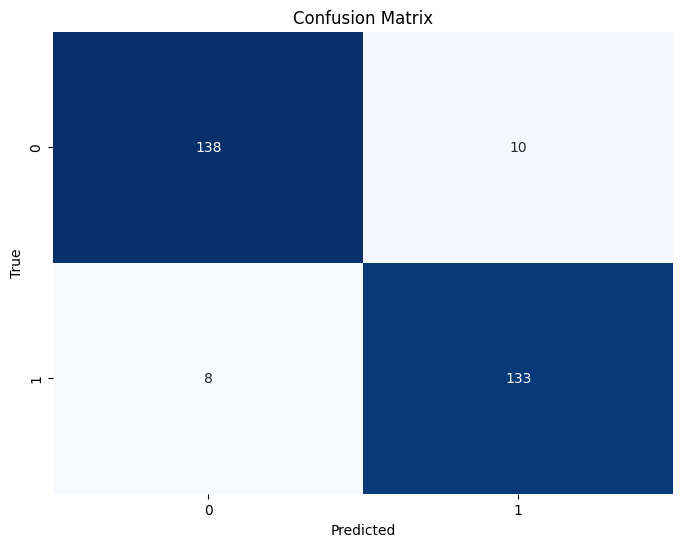

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming `best_dt` is your trained Decision Tree model and `X_test` is your test set
# Make sure your model has a method 'predict_proba' to predict the probabilities
y_pred_proba = best_dt.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# Output prediction graph and loss curve

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Adjusting parameters for Bayesian Optimization (they might be in float)
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

params = best_params
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'

# Create an empty dictionary to hold evaluation results
evals_result = {}

# Training the model
evals = [(dtrain, 'train'), (dtest, 'eval')]
num_round = best_params['n_estimators']
bst = xgb.train(params, dtrain, num_round, evals=evals, evals_result=evals_result)

# Extracting log loss from training
train_logloss = evals_result['train']['logloss']
eval_logloss = evals_result['eval']['logloss']




[0]	train-logloss:0.60870	eval-logloss:0.62639
[1]	train-logloss:0.53196	eval-logloss:0.56508
[2]	train-logloss:0.48152	eval-logloss:0.50741
[3]	train-logloss:0.43721	eval-logloss:0.47527
[4]	train-logloss:0.39750	eval-logloss:0.44695
[5]	train-logloss:0.36456	eval-logloss:0.42659
[6]	train-logloss:0.33090	eval-logloss:0.40292
[7]	train-logloss:0.30648	eval-logloss:0.38287
[8]	train-logloss:0.28175	eval-logloss:0.36362
[9]	train-logloss:0.26470	eval-logloss:0.35045
[10]	train-logloss:0.24878	eval-logloss:0.33903


C:\Users\vaibhav_cs\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [09:26:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[11]	train-logloss:0.23409	eval-logloss:0.33289
[12]	train-logloss:0.22306	eval-logloss:0.31970
[13]	train-logloss:0.20851	eval-logloss:0.30948
[14]	train-logloss:0.19839	eval-logloss:0.30223
[15]	train-logloss:0.18852	eval-logloss:0.29778
[16]	train-logloss:0.17839	eval-logloss:0.28861
[17]	train-logloss:0.16798	eval-logloss:0.28187
[18]	train-logloss:0.15956	eval-logloss:0.27839
[19]	train-logloss:0.15261	eval-logloss:0.26976
[20]	train-logloss:0.14548	eval-logloss:0.26150
[21]	train-logloss:0.13778	eval-logloss:0.25902
[22]	train-logloss:0.13088	eval-logloss:0.25410
[23]	train-logloss:0.12391	eval-logloss:0.24668
[24]	train-logloss:0.11985	eval-logloss:0.24566
[25]	train-logloss:0.11452	eval-logloss:0.24270
[26]	train-logloss:0.11016	eval-logloss:0.23975
[27]	train-logloss:0.10573	eval-logloss:0.23498
[28]	train-logloss:0.10278	eval-logloss:0.23067
[29]	train-logloss:0.09937	eval-logloss:0.22938
[30]	train-logloss:0.09660	eval-logloss:0.22878
[31]	train-logloss:0.09288	eval-logloss:

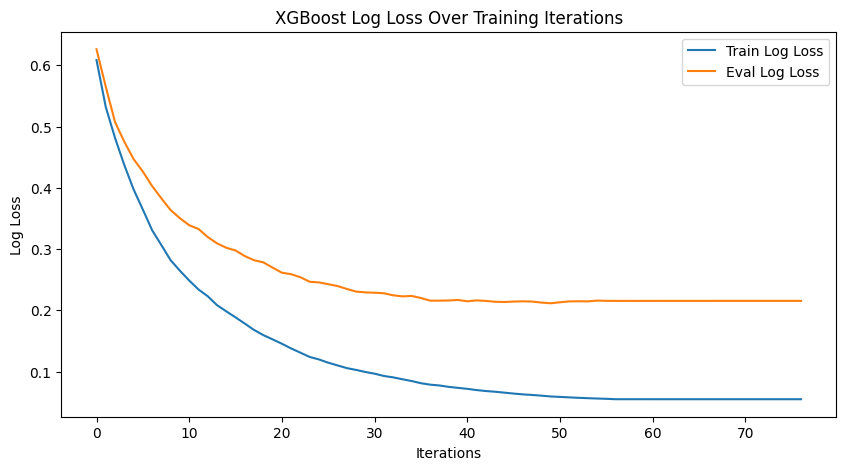

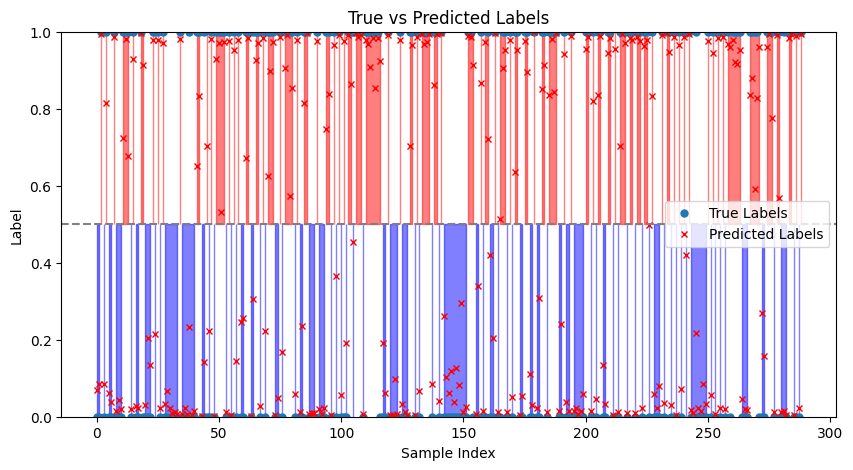

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_logloss, label='Train Log Loss')
plt.plot(eval_logloss, label='Eval Log Loss')
plt.legend()
plt.title('XGBoost Log Loss Over Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.show()

# Making predictions
predictions = bst.predict(dtest)

# Output Prediction Graph
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='True Labels', marker='o', linestyle='', markersize=5)
plt.plot(predictions, label='Predicted Labels', color='red', linestyle='', marker='x', markersize=5)
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.fill_between(range(len(y_test)), 0.5, 1, where=(predictions > 0.5), color='red', alpha=0.5)
plt.fill_between(range(len(y_test)), 0, 0.5, where=(predictions <= 0.5), color='blue', alpha=0.5)
plt.ylim(0, 1)  # Setting y-axis limits
plt.legend()
plt.title("True vs Predicted Labels")
plt.ylabel("Label")
plt.xlabel("Sample Index")
plt.show()

# Random Forest Hyperparameter tuning

In [ ]:
# Parameters for Grid and Randomized Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Parameters for Bayesian Optimization
bounds = {
    'n_estimators': (50, 150),
    'max_depth': (5, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}


# Grid Search for Random Forestt

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)
pca.fit(x)
data_pca = pca.transform(x)
data_pca = pd.DataFrame(data_pca,columns=[i for i in range(data_pca.shape[1])])
data_pca = s.fit_transform(data_pca)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data_pca,y,test_size=0.20,shuffle=True,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform the grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Retrieve and display the best parameters and best score
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_cv_score)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.9238095238095239


# 2.randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Parameters for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform the randomized search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

# Retrieve and display the best parameters and best score
best_params_random = random_search.best_params_
best_cv_score_random = random_search.best_score_

print("Randomized Search - Best Parameters:", best_params_random)
print("Randomized Search - Best Cross-Validation Score:", best_cv_score_random)


Randomized Search - Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Randomized Search - Best Cross-Validation Score: 0.922943722943723


# 3.Bayesian 

In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

# Function to evaluate the performance of the model given hyperparameters
def rf_eval(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    params = {
        'n_estimators': int(n_estimators),
        'max_depth': int(max_depth),
        'min_samples_split': int(min_samples_split),
        'min_samples_leaf': int(min_samples_leaf)
    }
    rf = RandomForestClassifier(**params, random_state=42)
    return cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy').mean()

# Define hyperparameter bounds for Bayesian optimization
bounds = {
    'n_estimators': (50, 150),
    'max_depth': (5, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=rf_eval, pbounds=bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=15)

# Retrieve and display the best parameters and best score
best_params_bayes = optimizer.max['params']
best_cv_score_bayes = optimizer.max['target']

# Convert the parameters to integers
best_params_bayes['n_estimators'] = int(best_params_bayes['n_estimators'])
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])

print("Bayesian Optimization - Best Parameters:", best_params_bayes)
print("Bayesian Optimization - Best Cross-Validation Score:", best_cv_score_bayes)


|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.9117    | 14.36     | 3.852     | 7.856     | 109.9     |
| 2         | 0.9203    | 8.9       | 1.468     | 2.465     | 136.6     |
| 3         | 0.9117    | 20.03     | 3.124     | 2.165     | 147.0     |
| 4         | 0.9143    | 25.81     | 1.637     | 3.455     | 68.34     |
| 5         | 0.91      | 12.61     | 2.574     | 5.456     | 79.12     |
| 6         | 0.9203    | 8.895     | 1.809     | 2.799     | 136.5     |
| 7         | 0.89      | 5.0       | 1.0       | 2.0       | 128.2     |
| 8         | 0.9091    | 10.65     | 2.156     | 3.749     | 141.4     |
| 9         | 0.9152    | 13.14     | 1.036     | 2.664     | 135.2     |
| 10        | 0.8944    | 5.478     | 1.095     | 7.147     | 137.0     |
| 11        | 0.9126    | 10.99     | 4.0       | 2.0       | 136.7     |
| 12        | 0.91      | 20.75     | 

In [ ]:
# Compare cross-validation scores
scores = {
    "Grid Search": best_cv_score,
    "Randomized Search": best_cv_score_random,
    "Bayesian Optimization": best_cv_score_bayes
}

# Determine the method with the highest score
best_method = max(scores, key=scores.get)
print(f"The best method is: {best_method} with a cross-validation score of {scores[best_method]:.4f}")

# Select the best parameters from the best method
if best_method == "Grid Search":
    best_params_final = best_params
elif best_method == "Randomized Search":
    best_params_final = best_params_random
else:
    best_params_final = best_params_bayes

# Initialize and train the Random Forest model with the best parameters
rf_best = RandomForestClassifier(**best_params_final, random_state=42)
rf_best.fit(x_train, y_train)

print("\nModel trained with the best parameters from", best_method)


The best method is: Bayesian Optimization with a cross-validation score of 0.9264

Model trained with the best parameters from Bayesian Optimization


Confusion Matrix:
[[139   9]
 [  8 133]]


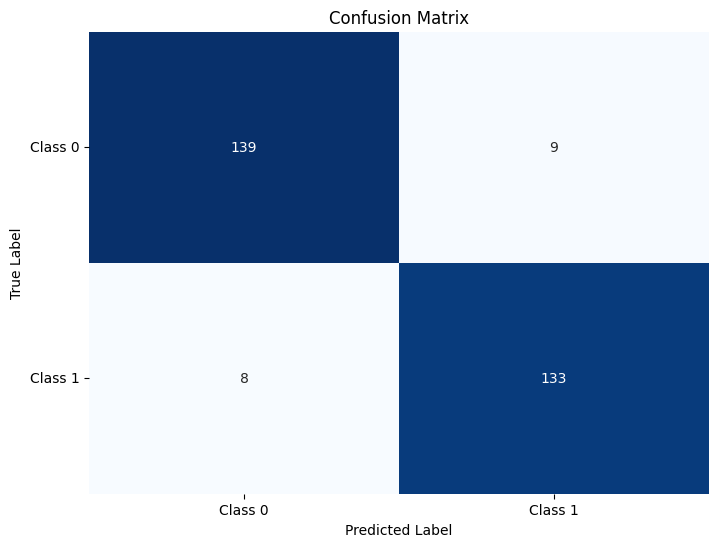

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = rf_best.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2) + 0.5, ['Class 0', 'Class 1'])
plt.yticks(np.arange(2) + 0.5, ['Class 0', 'Class 1'], rotation=0)
plt.show()


To plot the loss curve and output prediction curve, consider the following:

Loss Curve: Random Forest does not inherently have a loss function like gradient boosting methods. 

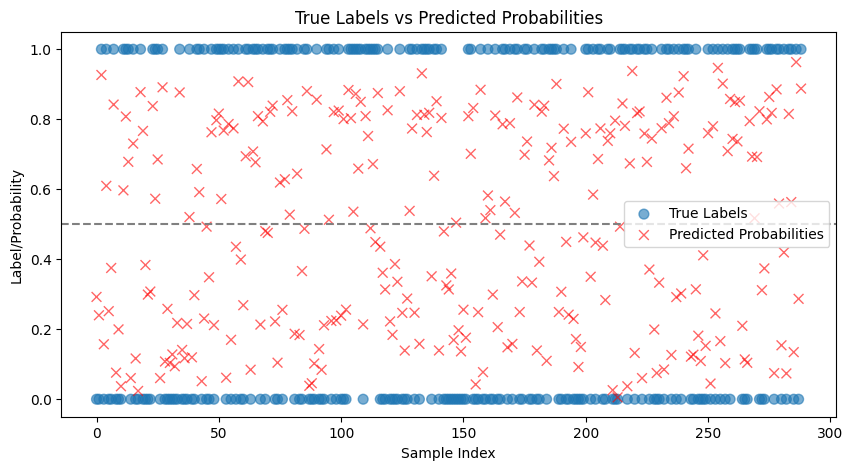

In [ ]:
# Predict probabilities for the test set
rf_probs = rf_best.predict_proba(x_test)[:, 1]  # Probabilities of the positive class

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='True Labels', marker='o', linestyle='', s=50, alpha=0.6)
plt.scatter(range(len(y_test)), rf_probs, label='Predicted Probabilities', color='red', marker='x', linestyle='', s=50, alpha=0.6)
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.legend()
plt.title("True Labels vs Predicted Probabilities")
plt.ylabel("Label/Probability")
plt.xlabel("Sample Index")
plt.show()


# Logistic Regression


# 1.Grid Search

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Grid Search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Grid Search
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print("Grid Search - Best Parameters:", best_params_grid)
print("Grid Search - Best Score:", best_score_grid)


Grid Search - Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Grid Search - Best Score: 0.8909090909090909


# 2. Randomized Search:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Parameters for Randomized Search
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Randomized Search
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Randomized Search - Best Parameters:", best_params_random)
print("Randomized Search - Best Score:", best_score_random)


Randomized Search - Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Randomized Search - Best Score: 0.8909090909090909


# 3. Bayesian Optimization:

In [ ]:
from bayes_opt import BayesianOptimization

# Function for Bayesian Optimization
def logreg_eval(C):
    return cross_val_score(LogisticRegression(C=C, penalty='l2', solver='liblinear'), x_train, y_train, cv=5, scoring='accuracy').mean()

# Bayesian Optimization
optimizer = BayesianOptimization(f=logreg_eval, pbounds={'C': (0.001, 100)}, random_state=42)
optimizer.maximize(init_points=2, n_iter=5)

best_params_bayes = optimizer.max['params']
best_score_bayes = optimizer.max['target']

print("Bayesian Optimization - Best Parameters:", best_params_bayes)
print("Bayesian Optimization - Best Score:", best_score_bayes)


|   iter    |  target   |     C     |
-------------------------------------
| 1         | 0.8762    | 37.45     |
| 2         | 0.8745    | 95.07     |
| 3         | 0.8762    | 38.77     |
| 4         | 0.8823    | 0.001     |
| 5         | 0.8771    | 9.589     |
| 6         | 0.8745    | 64.89     |
| 7         | 0.8771    | 2.666     |
Bayesian Optimization - Best Parameters: {'C': 0.001}
Bayesian Optimization - Best Score: 0.8822510822510823


# Comparing the results

Confusion Matrix:
[[139   9]
 [ 14 127]]


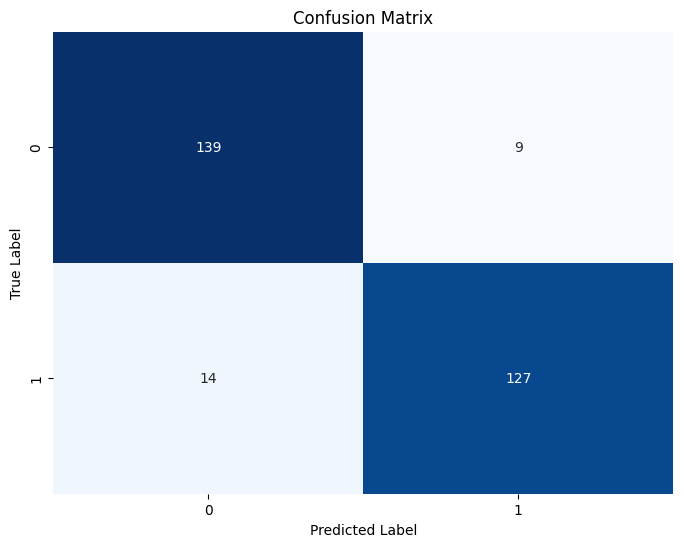

In [ ]:
# Select the best hyperparameters from the optimal method
if best_method == "Grid Search":
    best_params_final = best_params_grid
elif best_method == "Randomized Search":
    best_params_final = best_params_random
else:  # Bayesian Optimization
    best_params_final = {'C': best_params_bayes['C'], 'penalty': 'l2', 'solver': 'liblinear'}

# Train the logistic regression model with the best hyperparameters
logreg_best = LogisticRegression(**best_params_final)
logreg_best.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logreg_best.predict(x_test)

# Compute the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# If you wish to visualize it:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_log_loss(y_true, y_pred):
    # Avoid division by zero
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def logistic_regression(X, y, num_iterations, learning_rate):
    # Initialize weights and bias to zero
    weights = np.zeros(X.shape[1])
    bias = 0
    losses = []
    
    for i in range(num_iterations):
        # Calculate predictions
        z = np.dot(X, weights) + bias
        predictions = sigmoid(z)
        
        # Compute the loss
        loss = compute_log_loss(y, predictions)
        losses.append(loss)
        
        # Calculate the gradient
        gradient_weights = np.dot(X.T, (predictions - y)) / y.size
        gradient_bias = np.mean(predictions - y)
        
        # Update the weights and bias
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias
        
    return weights, bias, losses

# Assuming X_train and y_train are your features and target arrays
# Add intercept term to the features
X_train_intercept = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

# Hyperparameters
num_iterations = 100
learning_rate = 0.1

# Train the model
weights, bias, losses = logistic_regression(X_train_intercept, y_train, num_iterations, learning_rate)

# Plot the log loss over iterations
plt.plot(losses)
plt.title('Log Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.show()


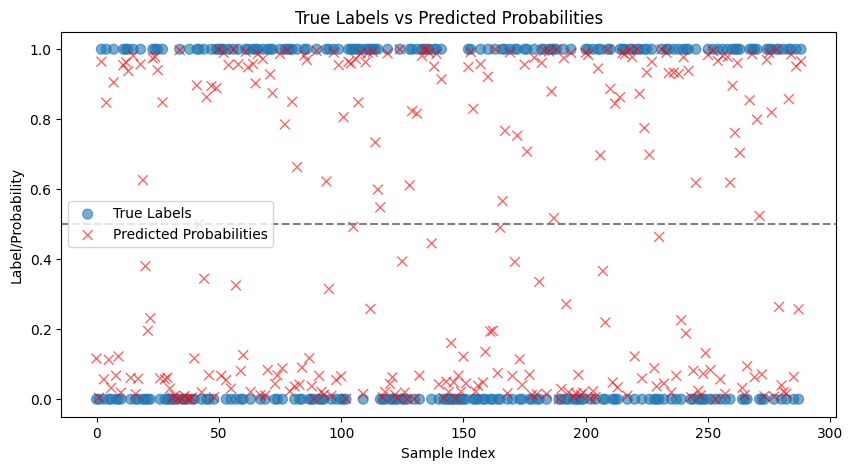

In [ ]:
# Predict probabilities for the test set using the best model
logreg_probs = logreg_best.predict_proba(x_test)[:, 1]  # Probabilities of the positive class

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='True Labels', marker='o', linestyle='', s=50, alpha=0.6)
plt.scatter(range(len(y_test)), logreg_probs, label='Predicted Probabilities', color='red', marker='x', linestyle='', s=50, alpha=0.6)
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.legend()
plt.title("True Labels vs Predicted Probabilities")
plt.ylabel("Label/Probability")
plt.xlabel("Sample Index")
plt.show()


# KNN


Unlike logistic regression, KNN doesn't have "iterations" during which it learns from the data; it's a lazy learner. However, we can still perform hyperparameter tuning for KNN to find the best value of 
k (the number of neighbors) which minimizes a loss metric like the error rate or maximizes the accuracy.

The following code will illustrate how to perform hyperparameter tuning for KNN to find the optimal number of neighbors:

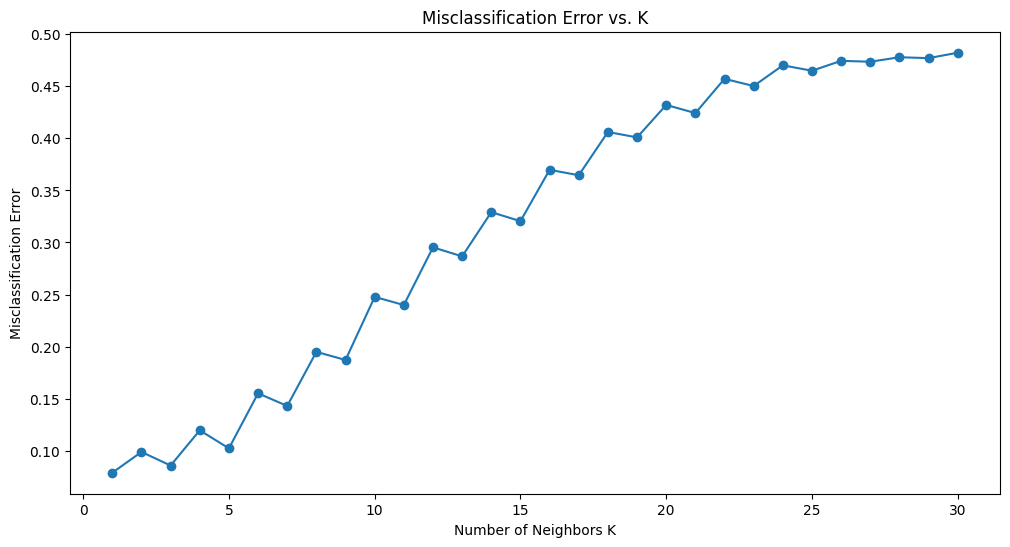

The optimal number of neighbors is 1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt


# Range of k to test
k_range = range(1, 31)

# Empty list to hold cross-validation scores
cv_scores = []

# Perform 10-fold cross-validation and store the mean accuracy for each value of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting the misclassification error versus k
# Calculate misclassification error (lower is better)
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(12, 6))
plt.plot(k_range, MSE, marker='o')
plt.title('Misclassification Error vs. K')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Finding the optimal k (with the minimum error)
optimal_k = k_range[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")


In the context of K-Nearest Neighbors (KNN), we typically don't talk about a "loss" since KNN is a non-parametric algorithm that doesn't learn a predictive model with parameters that minimize a loss function. However, you can still measure the performance of a KNN classifier using metrics such as accuracy, or in cases where you want something analogous to loss, you can use the "error rate" which is simply 
1
−
accuracy
1−accuracy.

The error rate can be considered a "loss" in the sense that it measures the rate at which the classifier makes incorrect predictions. A lower error rate corresponds to a better-performing model.

Here is how you can calculate and print the error rate for the optimal 
k found:

python


In [ ]:
# Assuming optimal_k is the optimal number of neighbors found previously

# Initialize the KNN model with the optimal number of neighbors
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# Fit the model on the training data
knn_optimal.fit(x_train, y_train)

# Predict on the test data
y_pred = knn_optimal.predict(x_test)

# Calculate the accuracy
accuracy_optimal = accuracy_score(y_test, y_pred)

# Calculate the error rate
error_rate_optimal = 1 - accuracy_optimal

# Print the error rate
print(f"Error rate for the optimal K ({optimal_k}) is: {error_rate_optimal:.2f}")


Error rate for the optimal K (1) is: 0.06


Confusion Matrix:
[[140   8]
 [  8 133]]


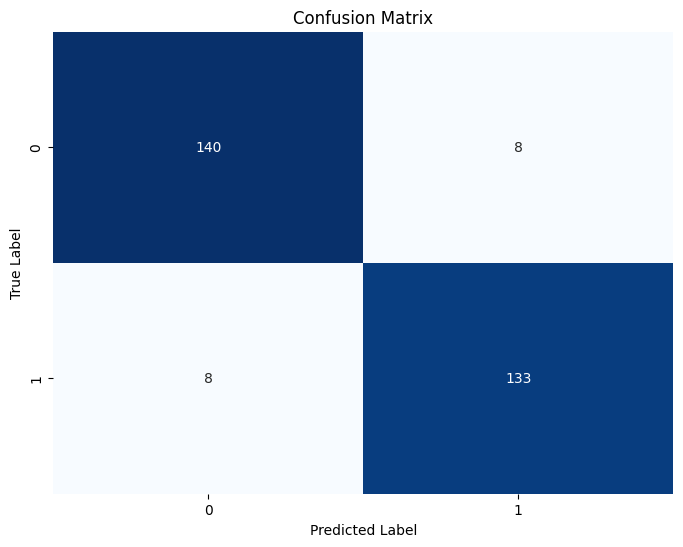

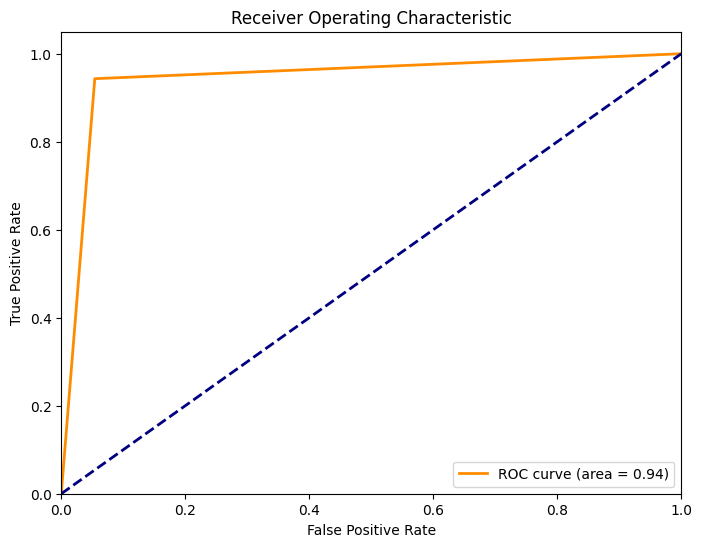

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
import seaborn as sns

# Assuming you have already predicted y_pred using the optimal KNN model

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate the ROC curve and ROC area for the optimal KNN
y_pred_proba = knn_optimal.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# DECISION TREES

Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation score (accuracy): 0.8043290043290044
Confusion Matrix:
[[119  29]
 [ 30 111]]


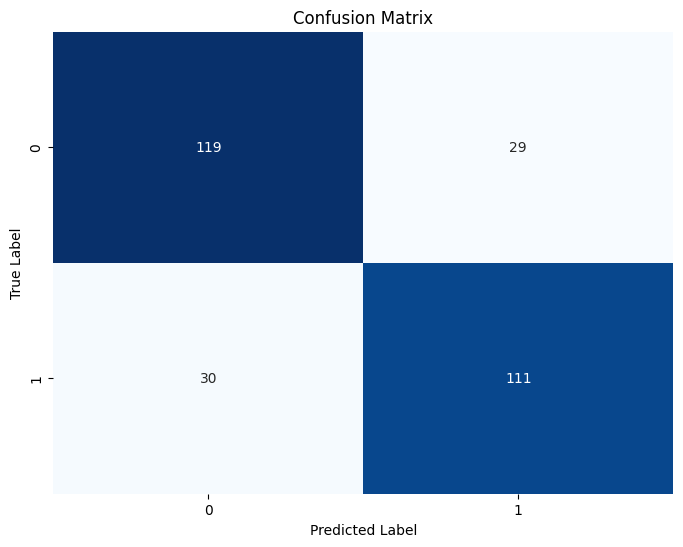

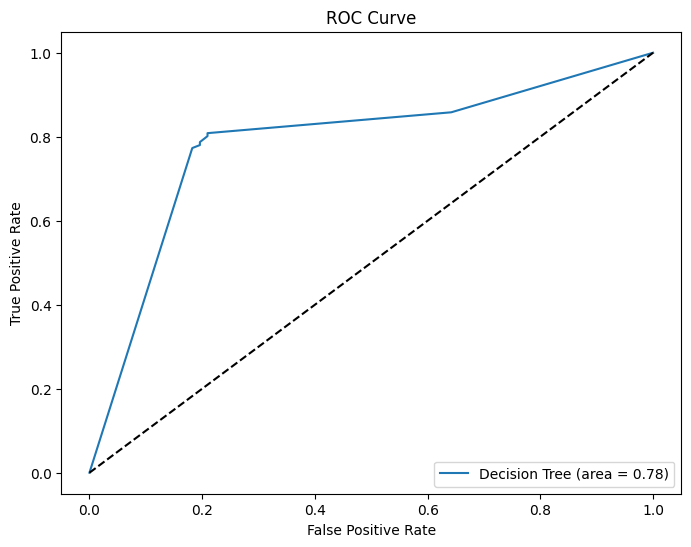

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming X and y are your features and target variable, and they have been scaled or preprocessed if necessary

# Define the parameter grid for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Retrieve the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score (accuracy): {best_score}")

# Train the best Decision Tree model
best_dt = grid_search.best_estimator_

# Make predictions
y_pred = best_dt.predict(x_test)
y_pred_proba = best_dt.predict_proba(x_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate and plot ROC curve and ROC area for the best Decision Tree
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
